Data on about 11,000 homes sold in a single year are extracted from Zillow for 50 campus towns in the U.S. (https://www.zillow.com). The House_Prices data represent a highly simplified/modified sample of anonymized homes, excluding homes with observations that seem erroneous and/or not pertaining to sales.

* `Variable` Name	Description or Possible Values
* `Record`	A modified ID for each house
* `Sale_amount`	Sale price of the house in U.S. dollars
* `Sale_date`	Sale date of the house
* `Beds`	Number of bedrooms in the house
* `Baths`	Number of bathrooms in the house
* `Sqft_home`	Square footage of the house
* `Sqft_lot`	Square footage of the lot
* `Type`	Multiple Family, Multiple Occupancy, Single Family
* `Build_year`	Year the house was built
* `Town`	Name of the campus town
* `University`	Name of the university

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Step 1

Look at the data, by inspecting it

1. How many rows are there?
2. Looks like there are some extra columns with row markers that appeared over the cleaning process.  How many "actual" columns are there?
3. Why are the dates just numbers?  Why is this ok?

In [3]:
# load dataset
house = pandas.read_csv("House Prices.csv")

# shape:
print("There are ",house.shape[0]," rows and ",house.shape[1]," columns")

house.head()

There are  10659  rows and  13  columns


,Unnamed: 0,Record,Sale_amount,Sale_date,Beds,Baths,Sqft_home,Sqft_lot,Type,Build_year,Town,University,Type2
0,1,1,295000.0,42521,5,3.00,2020,38332.8,3,1976,1,10,3
1,2,2,240000.0,42541,4,2.00,1498,54014.4,3,2002,1,10,3
2,3,3,385000.0,42521,5,4.00,4000,85813.2,3,2001,1,10,3
3,4,4,268000.0,42472,3,2.50,2283,118918.8,3,1972,1,10,3
4,5,5,186000.0,42465,3,1.25,1527,15681.6,3,1975,1,10,3


In [5]:
# cut 3 columns: Unnamed:0, Record, and Type2.

df_house = house.drop(columns = ['Unnamed: 0','Record','Type2'])
print("Now there are ", df_house.shape[1], " columns")

Now there are  10  columns


Dates are difficult to deal with - do we say day/month/year or month-day-year, or (Amy's favourite), YEAR-MONTH-DAY.

As a result, we often just assign them to a number - Excel counts from 1900-01-01, so January 1, 1900 is 1, and January 1, 2022 is 44,562 - that is 44,562 days makes 122 years.

In [6]:
X = df_house.drop(columns = ["Town", "University"])
Y = df_house['Town']

# split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4,random_state = 2022)

In [7]:
# Start with a decision tree
mdl_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=2022)

## Train on 4/5 of the data, testing on the 5th. Do this 5 times,
CV_score = cross_val_score(mdl_tree, X_train, Y_train, cv=5)

print("We have 5 scores: ", CV_score)
print("Averaging them gives us an accuracy score of:", CV_score.mean())

CV_score.var()

We have 5 scores:  [0.26114152 0.25801407 0.23377639 0.27912432 0.2595778 ]
Averaging them gives us an accuracy score of: 0.2583268178264269


0.00020896896458763407

In [9]:
# testing up to k = 15
N = 16

##initialize error vectors
accuracy_CV = [0 for j in range(0,N)] 

## This look will train and test, and store errors for each k 
for k in range(1,N):
    ## train
    tree_model = tree.DecisionTreeClassifier(max_depth = k, random_state=2022)
    CV_score =cross_val_score(tree_model, X_train, Y_train, cv =5)

    ##record accuracy
    accuracy_CV[k]=CV_score.mean()
    
accuracy_CV.pop(0)
accuracy_CV

[0.06473807662236122,
 0.10070367474589523,
 0.12556684910086005,
 0.17498045347928068,
 0.21720093823299455,
 0.23455824863174354,
 0.2406567630961689,
 0.25566849100860045,
 0.2606724003127443,
 0.2583268178264269,
 0.25566849100860045,
 0.253635652853792,
 0.25097732603596556,
 0.2501954652071931,
 0.2428459734167318]

My highest accuracy was at a max_depth of =  9
With a mean accuracy of  0.2606724003127443


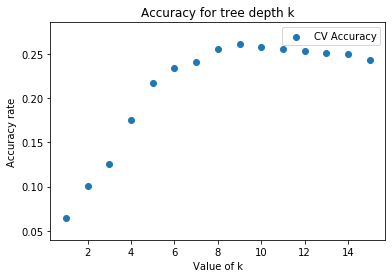

In [7]:
## find the location ofg the smallest test error
## add 1, as I popped off hte 0 at hte begining
k_best = np.argmax(accuracy_CV)+1

print("My highest accuracy was at a max_depth of = ",k_best)
print("With a mean accuracy of ",max(accuracy_CV))


K_array =list(range(1,N))

CV_plt=plt.scatter(K_array, accuracy_CV)
plt.legend([CV_plt], ['CV Accuracy'])
plt.xlabel("Value of k")
plt.ylabel("Accuracy rate")
plt.title("Accuracy for tree depth k")
plt.show()

In [10]:
# now let's look at KNN, testing up to k = 15

N=16

# initialize error vectors
KNN_CV = [0 for j in range(0,N)] 

#  This look will train and test, and store errors for each k 
for k in range(1,N):
    ## train
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
    CV_score = cross_val_score(knn_model, X_train, Y_train, cv =5)

    ##record accuracy
    KNN_CV[k] = CV_score.mean()

KNN_CV.pop(0)
KNN_CV

[0.12025019546520718,
 0.1060203283815481,
 0.10789679437060204,
 0.11540265832681781,
 0.11555903049257232,
 0.11587177482408131,
 0.12009382329945269,
 0.1164972634870993,
 0.11806098514464425,
 0.11759186864738076,
 0.12040656763096169,
 0.12212666145426114,
 0.12197028928850664,
 0.12228303362001565,
 0.12306489444878813]

My highest accuracy was at a k value of k =  15
With a mean accuracy of  0.12306489444878813


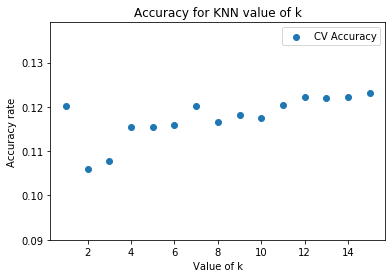

In [9]:
## find the location of the smallest test error
k_best = np.argmax(KNN_CV)+1

print("My highest accuracy was at a k value of k = ", k_best)
print("With a mean accuracy of ", max(KNN_CV))

K_array =list(range(1,N))

CV_plt=plt.scatter(K_array, KNN_CV)
plt.legend([CV_plt], ['CV Accuracy'])
plt.xlabel("Value of k")
plt.ylabel("Accuracy rate")
plt.title("Accuracy for KNN value of k")
plt.show()

In [12]:
# finally choose the depth=9
mdl_tree_best = tree.DecisionTreeClassifier(max_depth=9, random_state=2022)
CV_score =cross_val_score(mdl_tree_best, X_train, Y_train, cv=5)

# now train on ALL THE DATA
mdl_tree_best = mdl_tree_best.fit(X_train, Y_train)
    
# test
Y_pred = mdl_tree_best.predict(X_test)
Y_pred_train = mdl_tree_best.predict(X_train)

print("The Cross Validation Accuracy was: ", CV_score.mean())
print("And the training Accuracy is: ",accuracy_score(Y_train,Y_pred_train))
print("And the test Accuracy is: ",accuracy_score(Y_test,Y_pred))

The Cross Validation Accuracy was:  0.2606724003127443
And the training Accuracy is:  0.40781860828772476
And the test Accuracy is:  0.27157598499061913


By looking at the house prices, can we predict what town the house is in?  Create a classification model to answer this question:

1. Create your X and Y for the model.  We are predicting the town, so including the closest university would make the test too easy, so exclude that column, and any record IDs.
2. Split into a Training and Test Set
3. Start training!  Try out some models, use Cross-Validation to keep your Test data clean.  
* Use the `accuracy_score()` to pick a good model
* Test out your one best model using your test set.  
* Present your findings.  Was your testing accuracy as good as your training?  What did you think happened?
* Finally: Lee purchased a Single Family home (coded as 1) on 2018-04-11, (43201) for $350,000.  The house has 3 bedrooms and 2 bats.  It was built in 1992, and is on a 40,000 square foot lot.  What town do you think it is in?  Use your model to predict.

None of the models were amazing, but the test accuracy was better than the CV acccuracy, which is because the CV accuracy was lower than the training accuracy.  The training accuracy was actually quite high, which is why we used the CV accuracy to pick a model!

It's worth saying that 27% accuracy on classifying 50 towns isn't terrible - the base accuracy if we guess randomly would be 2%.

In [14]:
# use the mean squarefootage from the original set:
sqft = house[["Sqft_home"]].mean() # sqft[0] gives the number, sqft[1] gives me the type

lee = pandas.DataFrame({"Sale_amount":350000, 
                      "Sale_date" :43201, 
                      "Beds" : 3, 
                      "Baths":2,
                      "Sqft_home": sqft[0],
                      "Sqft_lot":40000,
                       "Type": 1,
                     "Build_year":1992},
                     index = [1])

mdl_tree_best.predict(lee)

array([16])

Town 16 is: Charlottesville, VA